<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Counting-coins" data-toc-modified-id="Counting-coins-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Counting coins</a></span><ul class="toc-item"><li><span><a href="#First,-blur-the-image." data-toc-modified-id="First,-blur-the-image.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First, blur the image.</a></span></li><li><span><a href="#Second,-find-edges-in-the-image." data-toc-modified-id="Second,-find-edges-in-the-image.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Second, find edges in the image.</a></span></li><li><span><a href="#Find-contours-of-the-outlines" data-toc-modified-id="Find-contours-of-the-outlines-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Find contours of the outlines</a></span></li></ul></li></ul></div>

# Contours
- use edges to find curves in an image, called contours
- contour = curve of points with no gaps in the curve
- contours allow to count objects in images and extract the objects from images

## Counting coins

In [1]:
import cv2
import matplotlib.pyplot as plt

b, g, r = cv2.split(cv2.imread('coins.png'))
coins =cv2.merge([r, g, b])
gray =  cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
plt.imshow(coins, cmap='gray')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

### First, blur the image.

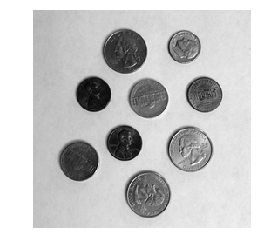

In [2]:
blurred = cv2.GaussianBlur(coins, (11, 11), 0)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

### Second, find edges in the image.

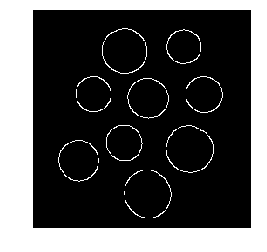

In [3]:
edged = cv2.Canny(blurred, 30, 150)

plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

### Find contours of the outlines

I count 9 coins in this image.


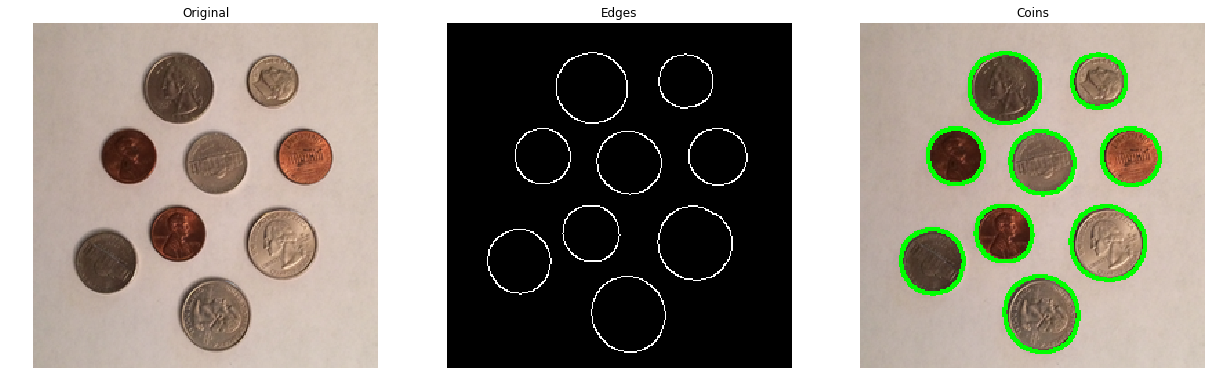

In [4]:
contours_type = cv2.RETR_EXTERNAL  # retrieves only the outermost contours
contour_approximation = cv2.CHAIN_APPROX_SIMPLE
_, contours, _ = cv2.findContours(edged.copy(), contours_type, contour_approximation)

print('I count {} coins in this image.'.format(len(contours)))

coins_copy = coins.copy()
contour_color = (0, 255, 0)  # green
line_thickness = 2
cv2.drawContours(coins_copy, contours, -1, contour_color, line_thickness)

images = [coins, edged, coins_copy]
descriptions = ['Original', 'Edges', 'Coins']
fig, axs = plt.subplots(ncols=len(images), squeeze=True, figsize=(21, 10))

for image, description, ax in zip(images, descriptions, axs):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(description)
plt.show()

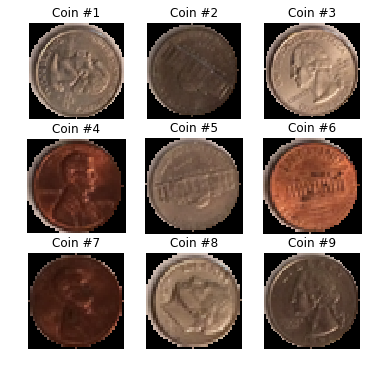

In [5]:
import numpy as np

fig, axs = plt.subplots(ncols=3, nrows=3, squeeze=True, figsize=(6, 6))

for i, contour, ax in zip(range(len(contours)), contours, axs.reshape(-1)):
    x, y, w, h = cv2.boundingRect(contour)  # finds enclosing box that the contour fits into
    
    coin = coins[y:y + h, x:x + w]
    mask = np.zeros(image.shape[:2], dtype='uint8')  # mask for the coins
    (centerX, centerY), radius = cv2.minEnclosingCircle(contour)  # finds enclosing circle that the contour fits into
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)  # fits circle to coins
    mask = mask[y:y+h, x:x+w]
    masked_coin = cv2.bitwise_and(coin, coin, mask=mask)
    
    ax.imshow(masked_coin)
    ax.axis('off')
    ax.set_title('Coin #{}'.format(i + 1))
plt.show()